In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import system as sys
import profile_maker
import wb_writer

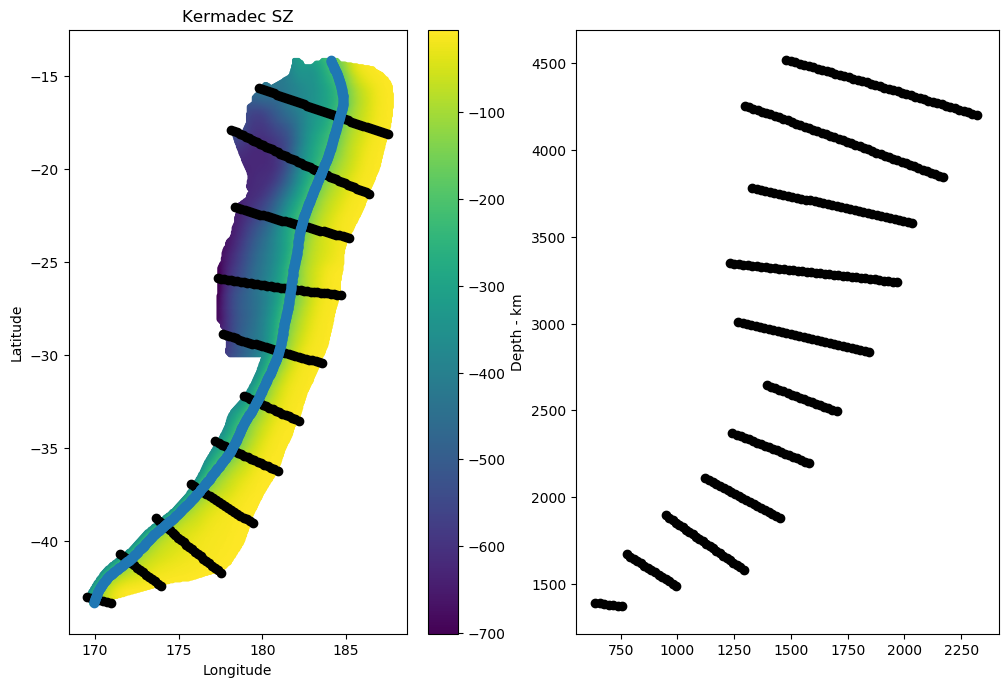

In [2]:
slab2_cont = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.in', delimiter='\t', comments='>', dtype=float)
slab2_dep = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.xyz', delimiter=',', comments='>')
slab2_cont = np.array(sorted(slab2_cont, key=lambda x: x[1], reverse=True))

depth_contour = -200
prof_num = 10
profile_spacing = 20
lon_spacing = 0.5
lat_spacing = 0.5
max_distance_point = 25.0
region_lon = [170, 190]
region_lat = [-50, -17]
output_dir = 'SZ_data/kermadec'
truncate = False
profile_maker.profile_generator(slab2_dep, slab2_cont, output_dir, depth_contour, prof_num, profile_spacing, region_lon, region_lat, \
                                lon_spacing, lat_spacing, max_distance_point, 90, 'East', truncate)
plt.figure(dpi=100, figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('Kermadec SZ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(slab2_dep[:,0], slab2_dep[:,1], c=slab2_dep[:,2], s = 5)
plt.colorbar(label = 'Depth - km')
poly = np.loadtxt(fname='polygon.txt')
for file in np.sort(os.listdir(output_dir + '/geographic')):
    profile_file = np.loadtxt(fname=output_dir + '/geographic/' + file)
    plt.scatter(profile_file[:, 0], profile_file[:, 1], c = 'k')
plt.scatter(slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 0], slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 1])
plt.subplot(1, 2, 2)
for file in np.sort(os.listdir(output_dir + '/cartesian')):
    profile_file = np.loadtxt(fname=output_dir + '/cartesian/' + file)
    plt.scatter(profile_file[:, 0] + 1500, profile_file[:, 1] + 2500, c = 'k')

In [5]:
sys('rm ../world_builder_files/5comp_nz_slab.wb')
world_builder_file = open('../world_builder_files/5comp_nz_slab.wb', 'a+')
world_builder_file.write('{\n')
world_builder_file.write('  "version":"0.5",\n')
world_builder_file.write('  "interpolation":"continuous monotone spline",\n')
world_builder_file.write('  "features":\n')
world_builder_file.write('  [\n\n')


###################################################################################################################################################

model_name = 'mantle layer'
feature_name = 'Upper Mantle'
min_depth = 125e3
max_depth = 660e3
coordinates = [[0.0, 0.0], [0.0, 5000e3], [4000e3, 5000e3], [4000e3, 0.0]]

temp_name = 'linear'
temp_max = 660e3
temp_min = 125e3
bot_temp = 1820
top_temp = 1600

comp_name = 'uniform'
comp_0 = 0
max_0 = 660e3
min_0 = 125e3

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, feature_name, min_depth, max_depth, coordinates, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_name, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_0, max_0, min_0, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

model_name = 'mantle layer'
feature_name = 'Lower Mantle'
min_depth = 660e3
max_depth = 2891e3

temp_name = 'linear'
temp_max = 2891e3
temp_min = 660e3
bot_temp = 3000
top_temp = 1820

comp_name = 'uniform'
comp_1 = 1
max_1 = 2891e3
min_1 = 660e3

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, feature_name, min_depth, max_depth, coordinates, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_name, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_1, max_1, min_1, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################
xshift = 2000
yshift = 2500
trench_x, trench_y = wb_writer.trench_extractor('SZ_data/kermadec/cartesian/', xshift, yshift, 'East', 'Cartesian')

feature_coordinates =  []
for i in range(len(trench_x)):
    feature_coordinates.append( [trench_x[i], trench_y[i]] )

is_subducting = True
dip_point = [-2000e8, 2000e3]
temp_features = 'half space model'

model_name = 'oceanic plate'
feature_name = 'oceanic plate'
x_bounds = [0, 4000e3]
y_bounds = [0, 5000e3]
ocean_coords, cont_coords = wb_writer.trench_splitter(trench_x, trench_y, x_bounds, y_bounds, 'East')

min_depth = 0.0
max_depth = 125e3
temp_name = 'half space model'
temp_max = 125e3
temp_min = 0.0
bot_temp = 1600
top_temp = 300
spr_vel = 0.005
ridge_coords = [[[4001e3, 0.0], [4001e3, 5000000.0]]]

comp_name = 'uniform'
comp_3 = 3
max_3 = 125e3
min_3 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, 'oceanic plate', min_depth, max_depth, ocean_coords, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.cooling_model(temp_name, temp_max, temp_min, bot_temp, top_temp, spr_vel, ridge_coords, first_last='both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_3, max_3, min_3, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

model_name = 'continental plate'
feature_name = 'continental plate'
min_depth = 0
max_depth = 125e3

temp_name = 'linear'
temp_max = 125e3
temp_min = 0.0
bot_temp = 1600
top_temp = 300

comp_name = 'uniform'
comp_4 = 4
max_4 = 125e3
min_4 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, feature_name, min_depth, max_depth, cont_coords, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_name, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_4, max_4, min_4, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

feature_names_list = 'Kermadec Slab'
feature_types = 'subducting plate'
profile_directory = 'SZ_data/kermadec/cartesian/'
sys('rm -rf ../data/plateau_directory/cartesian/.ipynb_checkpoints')
directory_path = '../data/plateau_directory/cartesian/'
segment_thickness = []
for file in np.sort(os.listdir(directory_path)):
    file_loc = os.path.join(directory_path, file)
    track_x = np.loadtxt(fname=file_loc, usecols=0) + xshift
    track_y = np.loadtxt(fname=file_loc, usecols=1) + yshift
    track_z = np.abs(np.loadtxt(fname=file_loc, usecols=2))
    thick_element = [ [150e3, np.min(track_z)], [125e3, 2000] ]
    segment_thickness.append(thick_element)
segment_thickness = np.array(segment_thickness)

world_builder_file.write('    {' + wb_writer.model_feature_string(feature_types, feature_names_list, 0, 10000e3, feature_coordinates, is_subducting, \
                                                 dip_point))
wb_writer.segment_section(world_builder_file, profile_directory, xshift, yshift, segment_thickness)

density = 3300
plate_vel = 0.005
couple_depth = 125e3
shallow_dip = 20
taper = 0
max_slab_top = 250e3
min_slab_top = -250e3
first_last = 'both'

world_builder_file.write('    ],\n')
world_builder_file.write(wb_writer.mass_conserving_model(density, plate_vel, couple_depth, shallow_dip, ridge_coords, taper, max_slab_top, min_slab_top, first_last))
# world_builder_file.write(temperature_feature.uniform_model('uniform', 500, 'add', 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, 3, 100000e3, 0, True, 'both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

model_name = 'oceanic plate'
min_depth = 0.0
max_depth = 10e3

temp_name = 'half space model'
temp_max = 10e3
temp_min = 0.0
bot_temp = 1600
top_temp = 300
spr_vel = 0.005

comp_name = 'uniform'
comp_2 = 2
max_2 = 10e3
min_2 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, 'oceanic crust', min_depth, max_depth, ocean_coords, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.cooling_model(temp_name, temp_max, temp_min, bot_temp, top_temp, spr_vel, ridge_coords, first_last='both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_2, max_2, min_2, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

feature_names_list = 'Kermadec Crust'
feature_types = 'subducting plate'
profile_directory = 'SZ_data/kermadec/cartesian/'
xshift = 2000
yshift = 2500
segment_thickness = 125e3

world_builder_file.write('    {' + wb_writer.model_feature_string(feature_types, feature_names_list, 0, 130e3, feature_coordinates, is_subducting, \
                                                 dip_point))

wb_writer.segment_section(world_builder_file, profile_directory, xshift, yshift, segment_thickness)

###################################################################################################################################################
        
world_builder_file.write('    ],\n')
world_builder_file.write(wb_writer.uniform_model('uniform', 20, 'add', 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, 2, 10e3, 0, True, 'both'))
world_builder_file.write('}\n')
world_builder_file.write('')
world_builder_file.write(']\n')
world_builder_file.write('}')
world_builder_file.close()